## Lab 10.1

### Activity 1
Name: `recaman-198`

Complete this activity before the end of the lab by entering the answer into the Brightspace quiz. Don't forget to add, commit and push this notebook to your repository.

Consider the following sequence:

* $a_n = a_{n-1} -n$ if $(a_{n-1}-n)>0$ and not $\in[a_0, a_1, \dots a_{n-1}]$
* $a_n = a_{n-1} +n$ else
* $a_0 = 0$

1. Calculate the elements of the sequence up to $n=198$.
2. Make a plot of $a_n$ vs. $n$. 
2. Enter element $a_{198}$ into quiz `recaman-198`

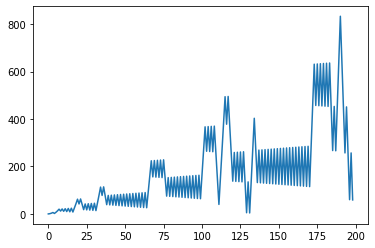

157
a198 = 59


In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = np.linspace(0, 198, 199)
val = [0]
for i in range(1, 199, 1):
    if val[i-1]-i > 0 and val[i-1]-i not in val:
        val.append(val[i-1]-i)
    else:
        val.append(val[i-1]+i)
        
plt.plot(n, val)
plt.show()

print(f"a198 = {val[-1]}")

## Activity 2
Name: `M115-1360-sigma`

1. Read the data object from the Python pickle `Data/data-Pgas-bndry-analysis.pkl`. 
2. Plot the fractional volume (`FV`) radial profile (`FV` as a function of `R`) for case `M115` for time `1360`hrs. Note the location of the sharp transition from `FV` essentially equal to zero to `FV` equal to almost exactly unity. 
3. Make a plot of the gradient of `FV` wrt `R` and use appropriate range for radius to zoom in on the transition.
4. Fit the gradient with a Gaussian with the fit parameters $A$, $\mu$ an $\sigma$ as in class using only those values of the gradient of `FV` that are larger than $50\%$ of the max of grad `FV`.
5. Check the quality of your fit visually by overplotting it to the data.
6. Enter the fit value of $\sigma$ into quiz `M115-1360-sigma`

Explore data set:

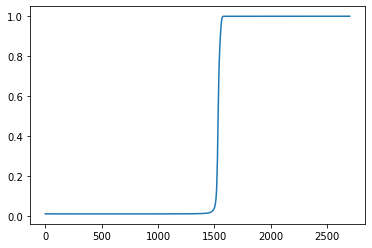

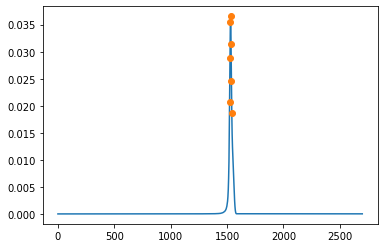

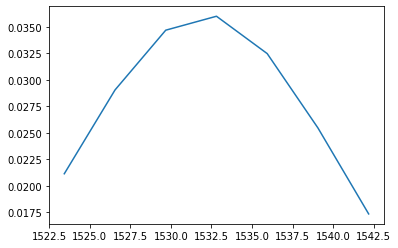

sigma = 8.345846283079696


In [70]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

f = open("data-Pgas-bndry-analysis.pkl", "rb")
data = pickle.load(f)

R = data["M115"][1360]["R"]
FV = data["M115"][1360]["FVcld"]

dFdR = np.gradient(FV, R)

plt.plot(R, FV)
plt.show()

plt.plot(R, dFdR)
ind = np.where(dFdR > 0.5*max(dFdR))
plt.plot(R[ind], dFdR[ind], 'o')
plt.show()

a = 0.035
b = 1500
c = 20
p0 = (a, b, c)
def gauss(x, a, mu, sigma):
    return a*np.exp(-1*((x-mu)**2)/(2*sigma**2))

sol, __ = curve_fit(gauss, R[ind], dFdR[ind], p0=p0)
plt.plot(R[ind], gauss(R[ind], *sol))
plt.show()
print(f"sigma = {sol[2]}")

f.close()